# Information Retrieval in High Dimensional Data

## Lab \#9, 18.01.2017

## Kernel PCA

### Task 1

In this task, we will once again work with the MNIST training set as provided on Moodle. Choose three digit classes, e.g. 1, 2 and 3 and load N=500 images from each of the classes to the workspace. Store the data in a normalized matrix X_mnist of type double and size ([784, 3*N]). Furthermore, generate a color label matrix C of dimensions (3, §*N). Each column of C assigns an RGB color vector to the respective column of X_mnist as an indicator of the digit class. Choose [0,0,1], [0,1,0] and [1,0,0] for the three digit classes.

In [3]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os

In [32]:
N = 500
PIXELS = 784
colors = np.array([[0,0,1], [0,1,0], [1,0,0]])
X_mnist = np.zeros((PIXELS, 3*N))
C = np.zeros((3, 3*N))
path = './mnist/'
foldernames = sorted(os.listdir(path))
for i in range(3):
    folderpath = path + foldernames[i] + '/'
    filenames = sorted(os.listdir(folderpath))
    for j in range(0, 500):
        im = imageio.imread(folderpath + filenames[j])
        X_mnist[:, i*N+j] = np.double(im).ravel()
        C[:, i*N +j] = colors[i,:]
X_mnist = X_mnist/255

a) Compute the principal subspace U of dimension 2 of X_mnist. Create a C-colored scatter plot of the scores of X_mnist with respect to this subspace.

In [33]:
U, Sigma, V_T = np.linalg.svd(X_mnist,compute_uv=True)

In [34]:
k = 2
U = U[:,:k]
Scores = np.dot(U.T,X_mnist)
index = range(3*N)

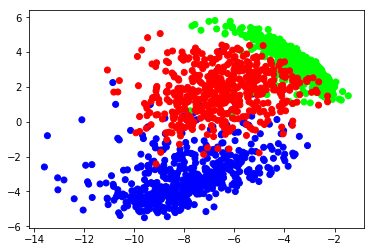

In [35]:
plt.scatter(Scores[0,index], Scores[1,index], c=C.T[index])
plt.show()

b) Write a Python function kgram which expects a data matrix of size (p, N_x) and a kernel function handle kappa as its input. It returns the Gram matrix K of X with respect to kappa. In order to reduce the number of for loops, assume that kappa accepts matrices as its input and calculates the kernel column-wise, returning a row vector as its output.

In [18]:
def kgram(X, kappa):
    K = np.zeros((X.shape[1], X.shape[1]))
    Y = np.zeros(X.shape)
    # Compute each row
    for i in range(K.shape[0]):
        # Create matrix Y for each row
        for j in range(Y.shape[1]):
            Y[:, j] = X[:, i]
        K[i, :] = kappa(X,Y)
    return K

c) Write a Python function kpca which expects a data matrix X , a kernel function handle kappa and the dimension of the intrinsic subspace k as its input, and returns the Kernel PCA scores S of X . The representation is to be computed according to the equation (7.11) in the lecture notes.

In [22]:
def kpca(X, kappa, k):
    # Create centering matrix
    n = X.shape[1]
    H = np.eye(n) - np.ones((n,n))/n
    K = kgram(X, kappa)
    K_schlange = np.dot(H, np.dot(K, H))
    #print(K_schlange.shape)
    eigenvalues, V = np.linalg.eigh(K_schlange)
    eigenvalues = eigenvalues[::-1]
    V = V[:, ::-1]
    Sigma = np.diag(np.sqrt(eigenvalues))
    S = np.dot(Sigma[:k, :k], V[:, :k].T)
    return S
    

In [23]:
def kappa_1(X,Y):
    return np.sum(X*Y, axis = 0)

In [24]:
def kappa_2(X, Y):
    c = 1
    d = 2
    return (np.sum(X*Y, axis=0)+c)**d

In [25]:
def kappa_3(X, Y):
    return np.exp(-np.xum((X-Y)**2, axis=0)/(s*sigma**2))

In [36]:
S = kpca(X_mnist, kappa_2, 3)

/home/martin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


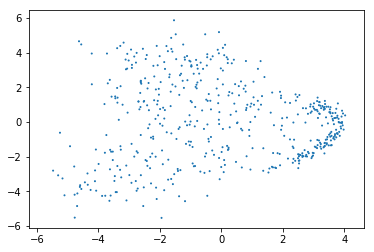

In [27]:
idx = range(3*N)
plt.scatter(S[0,idx], S[1,idx], C.T[idx])
plt.show()